In [38]:
# features extract


In [39]:
# test for one data
# load data
import numpy as np

y1 = np.loadtxt("./dataset/rockshape/train/1-1")
print(y1.shape)
print(max(y1))
print(min(y1))


(8192,)
1.6501344442367554
-1.9028303623199463


In [40]:
# test for another data
import numpy as np

y2 = np.loadtxt("./dataset/rockshape/train/1-2")
print(y2.shape)
print(max(y2))
print(min(y2))


(8192,)
1.3061027526855469
-1.245212197303772


In [41]:
# features extract
import numpy as np
from os import listdir
FileList = listdir('./dataset/rockshape/train/')
# 返回文件夹下文件的个数
m = len(FileList)
# print(FileList)
print(m)
for i in range(m):
    # 获得文件的名字
    fileNameStr = FileList[i]
    # 获得分类的数字
    classNumber = int(fileNameStr.split('-')[1])
    data = np.loadtxt(f"./dataset/rockshape/train/{fileNameStr}")
    # print(data)
    max_value = max(data)
    min_value = min(data)
    # print(min(data))
    # print(max_value)
    # print(min_value)
    saveArr = [max_value, min_value, classNumber]
    saveArr = np.array(saveArr, dtype=float).reshape(1, 3)
    print(saveArr)
    print(saveArr.ndim)
    # saveClassName = np.array([1], dtype=int)
    with open("./dataset/rockshape/features_extract/test1.csv", 'a+') as f:
        np.savetxt(f, saveArr, delimiter=',')
        # # np.savetxt(f,)
        # np.savetxt(f, saveClassName)

    # with open("./dataset/rockshape/features_extract/test1.csv", 'a+') as f:
  

474
[[ 0.64848459 -0.76722121  4.        ]]
2
[[ 0.6454401  -0.77331024  4.        ]]
2
[[ 0.78548837 -0.91335851  3.        ]]
2
[[ 0.79462194 -0.91640306  3.        ]]
2
[[ 0.6423955  -0.76722121  4.        ]]
2
[[ 1.31828082 -1.25434577  2.        ]]
2
[[ 1.33959246 -1.27261293  2.        ]]
2
[[ 2.32601976 -2.6944077   5.        ]]
2
[[ 0.64848459 -0.76722121  4.        ]]
2
[[ 2.35950971 -2.71876383  5.        ]]
2
[[ 1.33654797 -1.27565742  2.        ]]
2
[[ 2.31993079 -2.69136333  5.        ]]
2
[[ 1.31828082 -1.25434577  2.        ]]
2
[[ 1.64100087 -1.89369667  1.        ]]
2
[[ 1.64708996 -1.90283036  1.        ]]
2
[[ 0.64848459 -0.7702657   4.        ]]
2
[[ 2.21032763 -2.44475651  6.        ]]
2
[[ 1.64404535 -1.90283036  1.        ]]
2
[[ 0.78244382 -0.90726948  3.        ]]
2
[[ 2.25295115 -2.48433542  6.        ]]
2
[[ 1.63795638 -1.90283036  1.        ]]
2
[[ 0.80071098 -0.92858118  3.        ]]
2
[[ 1.33350348 -1.27261293  2.        ]]
2
[[ 0.80984461 -0.93162572  3. 

In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn import svm  # svm导入
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.exceptions import ChangedBehaviorWarning

# 设置属性防止中文乱码
# mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False

# warnings.filterwarnings('ignore', category=ChangedBehaviorWarning)

# 读取数据
feature = u'Amp1', u'Amp2'
path = './dataset/rockshape/features_extract/test1.csv'  # 数据文件路径
data = pd.read_csv(path, header=None)
# print(data)
x, y = data[list(range(2))], data[2].astype(int)
# print("x=",x)
# print("y=",y)
# y = pd.Categorical(y).codes  # 把文本数据进行编码，比如a b c编码为 0 1 2

# x = x[[1, 2]]
# print("x=", x)
print("y=", y)

# ## 数据分割
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, train_size=0.8)
# print(x_train)


y= 0       4
1       4
2       3
3       3
4       4
       ..
2365    2
2366    5
2367    2
2368    4
2369    5
Name: 2, Length: 2370, dtype: int64


In [43]:
clf = SVC(C=1,kernel='rbf',gamma=0.1)

## 模型训练
clf.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

In [44]:
print (clf.score(x_train, y_train)) 
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

1.0
训练集准确率： 1.0
1.0
测试集准确率： 1.0


In [45]:
print ('decision_function:\n', clf.decision_function(x_train))
print ('\npredict:\n', clf.predict(x_train))

decision_function:
 [[ 3.26315592  5.27987097  4.28597552  1.70940266 -0.30985409  1.2775301 ]
 [ 3.28008782  2.24118957  1.26709053 -0.31672921  4.21506878  5.28081472]
 [ 3.27639678  2.20150596  1.2522781  -0.31706909  5.28288234  4.27151723]
 ...
 [ 3.280167    2.24122969  1.26728832 -0.31671825  4.21373286  5.28075074]
 [ 3.26147187  5.27971313  4.28577577  1.71241947 -0.31025659  1.2765079 ]
 [ 3.26166525  5.27973257  4.28579979  1.71206165 -0.31021332  1.2766247 ]]

predict:
 [2 6 5 ... 6 2 2]


/tmp/ipykernel_208958/1473834426.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, ls=':')


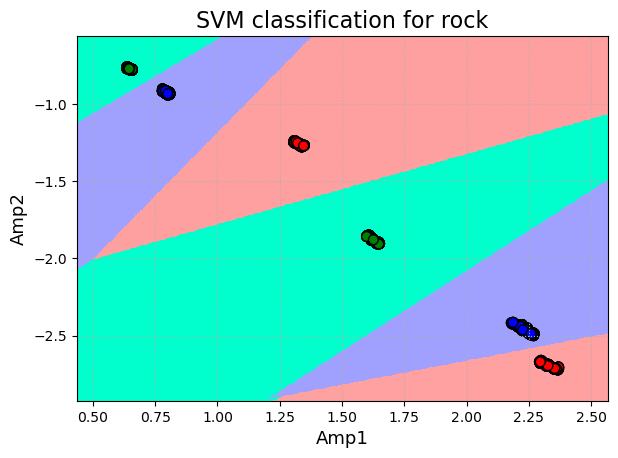

In [46]:
N = 500
# 定义显示范围
x1_min, x2_min = x.min()-0.2
x1_max, x2_max = x.max()+0.2

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0]  # 测试点


grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(
    ['#00FFCC', '#FFA0A0', '#A0A0FF', '#01FFCC', '#FFA0A1', '#A0A1FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b', 'g', 'r', 'b'])
plt.figure(facecolor='w')
# 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
# 所有样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
# 测试数据集
plt.scatter(x_test[0], x_test[1], s=120,
            facecolors='none', zorder=10)     # 圈中测试集样本
# lable列表
plt.xlabel(feature[0], fontsize=13)
plt.ylabel(feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('SVM classification for rock', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()
